In [1]:
import pandas as pd

/tmp/ipykernel_6382/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
houses = pd.read_csv('california_housing.csv')

In [3]:
houses.shape
#Identify shape and size of the data (1 point)\
# The data has 9 columns and 20634, meaning that the data holds information for 20634 houses
# From using ls -lh california_housing.csv the data is of size 1.8 megabytes
# -rw-r--r-- 1 root root 1.8M Mar 13 03:58 california_housing.csv

(20634, 9)

In [4]:
houses.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.1827      26.0  4.521429   0.921429       305.0  2.178571     40.05   
1  3.0755      32.0  4.623068   0.983353      3868.0  4.599287     32.77   
2  1.8235      40.0  4.701149   1.126437       928.0  3.555556     37.75   
3  1.4625      37.0  4.247845   1.105603      1673.0  3.605603     33.99   
4  1.9063      13.0  3.453125   0.984375       286.0  4.468750     33.97   

   Longitude  price_above_median  
0    -122.10                   0  
1    -117.06                   0  
2    -122.16                   0  
3    -118.28                   0  
4    -118.16                   0

In [5]:
houses.info()
#Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them if required. (1 point)
# The data consists of floats for all but one column, the price above median which is an integer. There is no need for datatype conversion. While the price_above_median is a boolean value of 0s and 1s, I am choosing to keep it as an integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [6]:
houses.duplicated().sum()
houses.drop_duplicates(inplace=True, ignore_index=True)
# while there are no duplicates in the initial dataset, I am still dropping duplicates just in case
houses['price_above_median'].unique()

array([0, 1])

In [7]:
houses.isnull().sum()
# no null values for data, no need for null replacement

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

In [8]:
houses.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457            0.500012  
min        0.692308     32.540000   -124.350000            0.000000  
25%        2.429649     33.930000   -121.800000            0.000000  
50%        2.817937     34.260000   -118.490000            0.500000  
75%        3.282249     37.710000   -118.010000            1.000000  
max     1243.333333     41.950000   -114.310000            1.000000

In [9]:
# Get the statistical information (mean, median, etc.) for all variables and derive meaniful insights from it. Comment if you see any anamolies in the data. (1 point)
# Immediately I see anomalies in the data, columns AveRooms, AveBedrms, AveOccup, and Population have max values that are extremely high above the mean
# Another thing to note is the price_above_median the dependent variable for the Ml models is evenly split, with a mean of 0.5
# The median income ranges from 0.5 to 15, this could be in tens of thousands, so from $5000 to 150000 or from hundreds of thousands
# The anomalies could suggest larger buildings like offices or apartments were counted as a house within the dataset
# The longitude and latitude checks out for houses in the California area

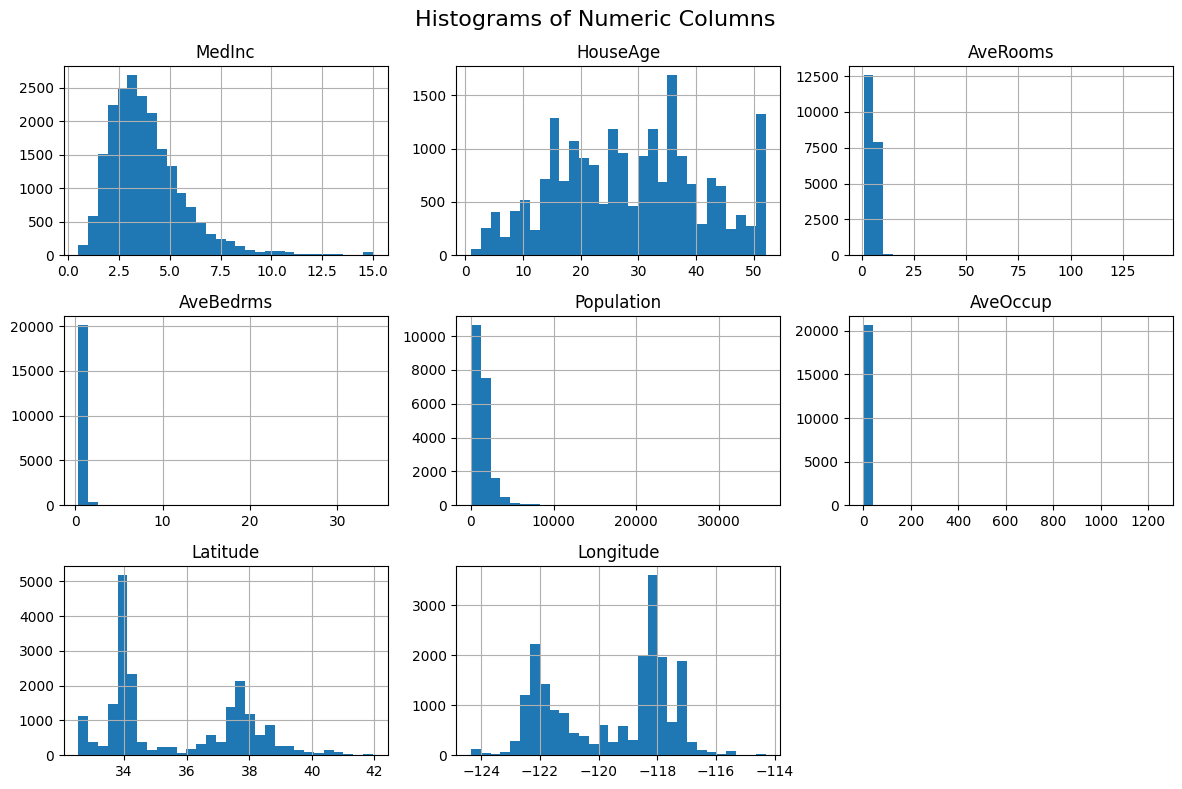

In [10]:
import matplotlib.pyplot as plt

numeric_cols = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
houses[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()


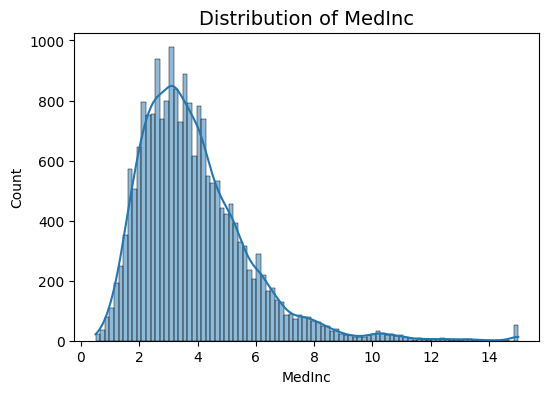

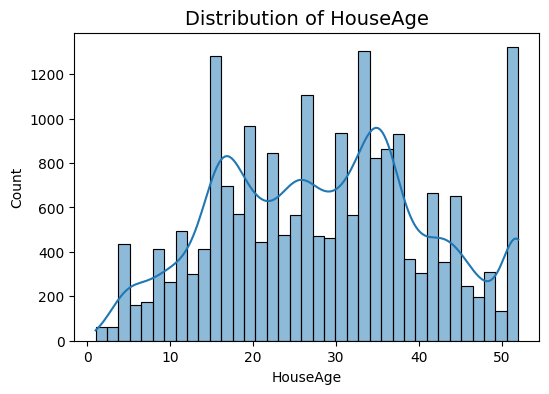

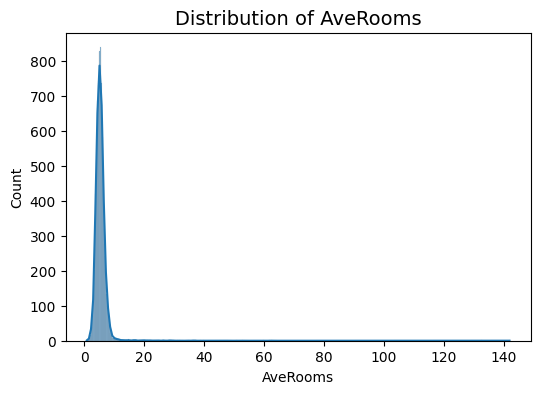

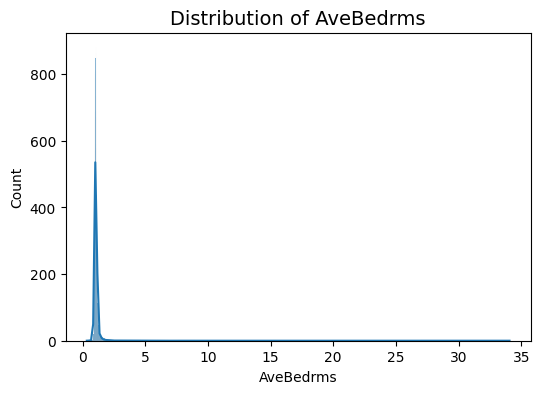

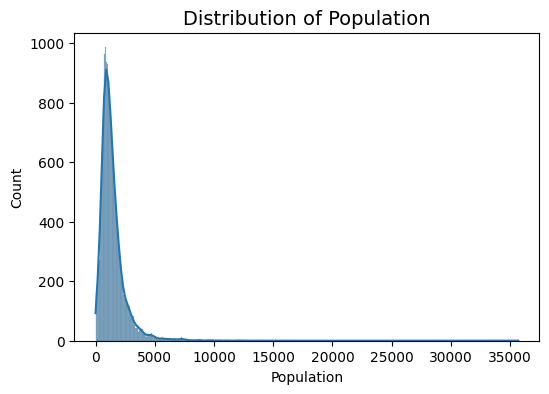

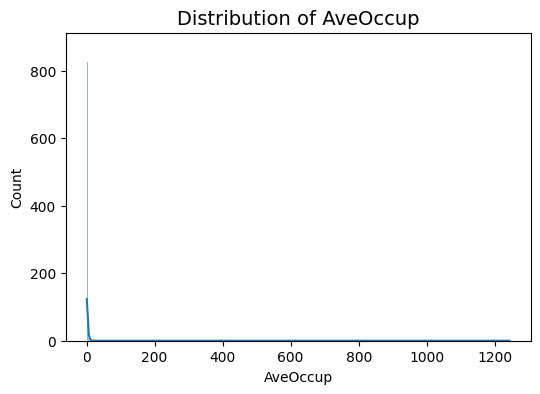

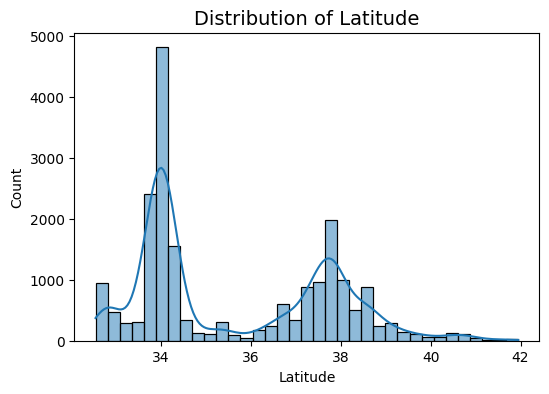

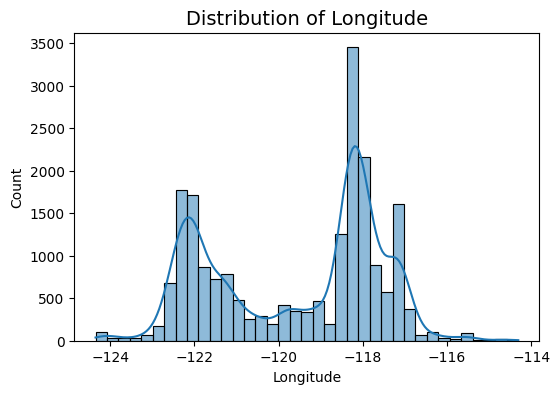

In [11]:
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=houses, x=col, kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


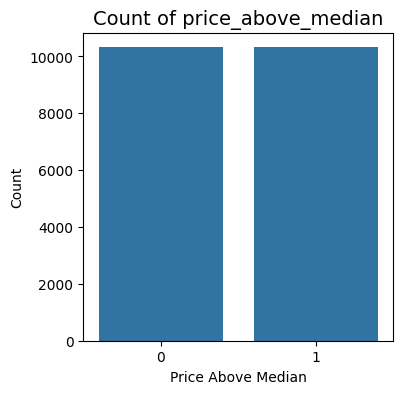

In [12]:
plt.figure(figsize=(4, 4))
sns.countplot(data=houses, x='price_above_median')
plt.title('Count of price_above_median', fontsize=14)
plt.xlabel('Price Above Median')
plt.ylabel('Count')
plt.show()

In [13]:
# Visualize the dataset through different univariate analysis and comment on your observations. (2)
# Most noticeable from the graphs is that for variables with high outliers, there are no data points with anything in between the max/outlier count and what most of the data have. 
# For example, most houses have around 1-10 rooms, and almost none with 10+ until the large outlier counts are reached.
# the graph of the price_above_median confirms that this data is evenly split
# there is one range for both longitude and latitude where many houses are found, shows that either this area is highly populated, or lots of houses from this area is in the dataset

In [14]:
import pandas as pd
# try capping the data in order to work around the large outliers in the set
houses_capped = houses.copy()

numeric_columns = houses_capped.select_dtypes(include=['number']).columns

lower_quantile = 0.01
upper_quantile = 0.99

for col in numeric_columns:
    lower_bound = houses_capped[col].quantile(lower_quantile)
    upper_bound = houses_capped[col].quantile(upper_quantile)
    houses_capped[col] = houses_capped[col].clip(lower_bound, upper_bound)

print(houses_capped.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.852360     28.649607      5.334334      1.077028   1403.927259   
std        1.803886     12.565946      1.321601      0.158411    972.507741   
min        1.069457      4.000000      2.581114      0.872823     88.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       10.596780     52.000000     10.357436      2.127574   5806.010000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       2.916215     35.627868   -119.569514            0.500000  
std        0.732059      2.123674      1.976349            0.500012  
min     

In [15]:
from sklearn.preprocessing import RobustScaler

#implement robust scaler to the uncapped data as the column values all have varying ranges
numeric_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

scaler = RobustScaler()

houses[numeric_cols] = scaler.fit_transform(houses[numeric_cols])

In [16]:
from sklearn.preprocessing import RobustScaler

# scale capped data as well
numeric_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

scaler = RobustScaler()

houses_capped[numeric_cols] = scaler.fit_transform(houses_capped[numeric_cols])

In [17]:
houses.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.063400e+04  20634.000000  20634.000000  20634.000000  20634.000000   
mean   1.540840e-01     -0.018926      0.124100      0.512105      0.276544   
std    8.716158e-01      0.662349      1.535507      5.072417      1.206970   
min   -1.392464e+00     -1.473684     -2.719932     -7.657364     -1.239872   
25%   -4.455009e-01     -0.578947     -0.489162     -0.457161     -0.404051   
50%   -1.018743e-16      0.000000      0.000000      0.000000      0.000000   
75%    5.544991e-01      0.421053      0.510838      0.542839      0.595949   
max    5.260148e+00      1.210526     84.817923    353.387358     36.797441   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       0.296168      0.362890     -0.284853            0.500000  
std       12.183328      0.565010      0.528617            0.500012  
min       -2.493115     -0.455026     -1.546174            0.000000  
25%       -0.455417     -0.087302     -0.873351            0.000000  
50%        0.000000      0.000000      0.000000            0.500000  
75%        0.544583      0.912698      0.126649            1.000000  
max     1454.980024      2.034392      1.102902            1.000000

In [18]:
# part 2
# uncapped split
from sklearn.model_selection import train_test_split

y = houses['price_above_median']
X = houses.drop('price_above_median', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [19]:
# capped split
from sklearn.model_selection import train_test_split

y = houses_capped['price_above_median']
X = houses_capped.drop('price_above_median', axis=1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [20]:
# Print report showing accuracy, recall, precision and f1-score for each classification model on all data (training, testing, etc.). Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)
# for all model training, i am prioritizing the metric accuracy (explained in paper)

In [21]:
import numpy as np
# knn with grid search to find best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring="accuracy")
knn_gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [22]:
knn_gscv.best_params_


{'n_neighbors': 10}

In [23]:
from sklearn.metrics import classification_report
model = knn_gscv.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      3095
           1       0.85      0.80      0.83      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7222
           1       0.89      0.82      0.86      7221

    accuracy                           0.86     14443
   macro avg       0.86      0.86      0.86     14443
weighted avg       0.86      0.86      0.86     14443



Confusion Matrix:
 [[2663  432]
 [ 618 2478]]


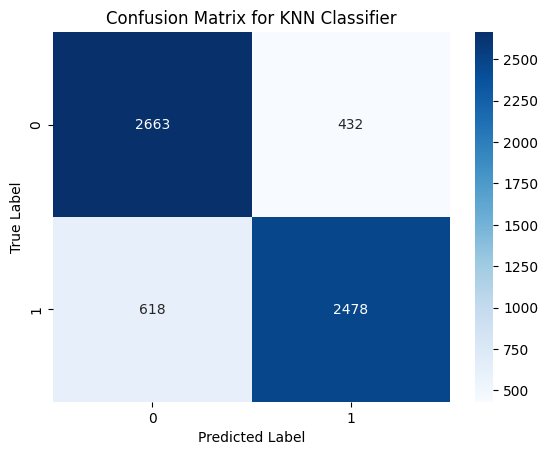

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = knn_gscv.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()


In [35]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [36]:
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3095
           1       0.83      0.84      0.83      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



Confusion Matrix:
 [[2556  539]
 [ 492 2604]]


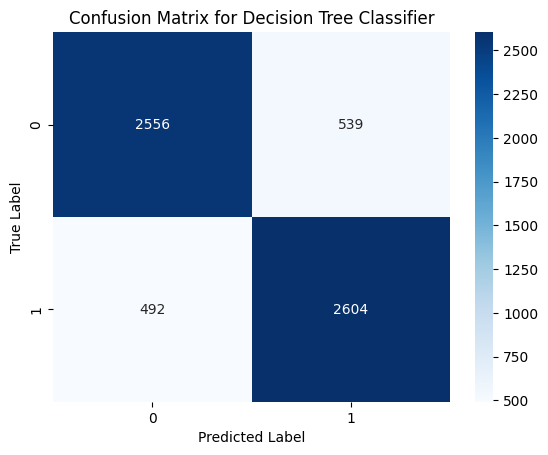

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = model

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


[Text(0.6077060923127934, 0.9791666666666666, 'x[0] <= 0.238\ngini = 0.5\nsamples = 14443\nvalue = [7222, 7221]'),
 Text(0.3226225665597599, 0.9375, 'x[0] <= -0.322\ngini = 0.425\nsamples = 9018\nvalue = [6256, 2762]'),
 Text(0.14216303129552318, 0.8958333333333334, 'x[2] <= -0.801\ngini = 0.294\nsamples = 4682\nvalue = [3843, 839]'),
 Text(0.09095581915196436, 0.8541666666666666, 'x[5] <= 0.881\ngini = 0.439\nsamples = 1385\nvalue = [935, 450]'),
 Text(0.07756485569329173, 0.8125, 'x[7] <= 0.355\ngini = 0.496\nsamples = 844\nvalue = [459, 385]'),
 Text(0.05790756668359687, 0.7708333333333334, 'x[0] <= -0.66\ngini = 0.499\nsamples = 743\nvalue = [359, 384]'),
 Text(0.031155290873877445, 0.7291666666666666, 'x[2] <= -1.181\ngini = 0.463\nsamples = 380\nvalue = [242, 138]'),
 Text(0.021298565025925534, 0.6875, 'x[6] <= 0.866\ngini = 0.498\nsamples = 206\nvalue = [96, 110]'),
 Text(0.012948813118487222, 0.6458333333333334, 'x[0] <= -1.031\ngini = 0.469\nsamples = 157\nvalue = [59, 98]'),


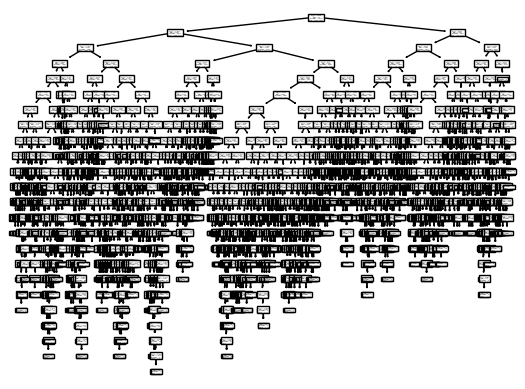

In [26]:
from sklearn import tree
tree.plot_tree(model)

In [27]:
# random forrest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

model = RandomForestClassifier()
param_grid = {
    "n_estimators": [50, 80],          
    "max_depth": [4, 8, 12],         
    "min_samples_leaf": [1, 2],        
    "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.3, 1: 0.7}],
}
gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="accuracy", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 12,
 'min_samples_leaf': 1,
 'n_estimators': 80}

In [28]:
from sklearn.metrics import classification_report
model = gscv.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.91      0.82      0.87      3095
           1       0.84      0.92      0.88      3096

    accuracy                           0.87      6191
   macro avg       0.88      0.87      0.87      6191
weighted avg       0.88      0.87      0.87      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7222
           1       0.91      0.99      0.95      7221

    accuracy                           0.94     14443
   macro avg       0.95      0.94      0.94     14443
weighted avg       0.95      0.94      0.94     14443



Confusion Matrix:
 [[2549  546]
 [ 237 2859]]


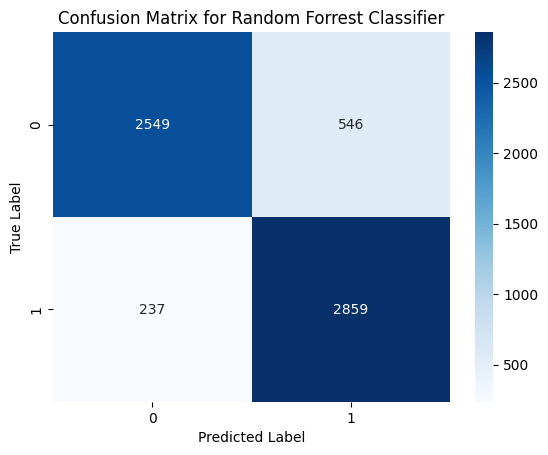

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = gscv.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forrest Classifier")
plt.show()


In [30]:
# ada boost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid = {
   'learning_rate': [0.1, 0.5, 1.0],
   'n_estimators': [50, 100, 200]
}

abc = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)
grid_search = GridSearchCV(abc, param_grid, cv=3, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=8,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [31]:

from sklearn.metrics import classification_report
model = grid_search.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3095
           1       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7222
           1       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443



Confusion Matrix:
 [[2692  403]
 [ 361 2735]]


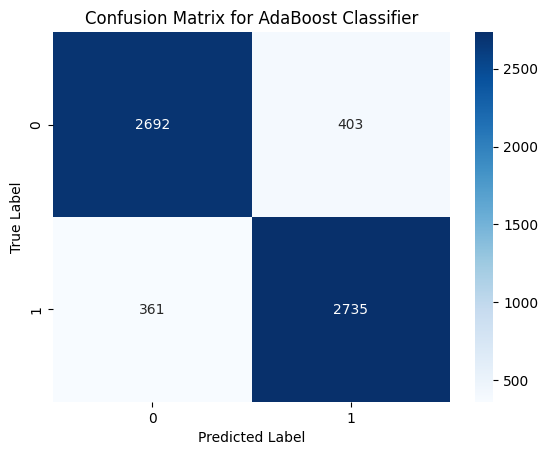

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()


In [39]:
# gradient boost
from sklearn.ensemble import HistGradientBoostingClassifier

param_grid = {
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 7],
   'l2_regularization': [0, 0.1, 1]
}

hgb = HistGradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(hgb, param_grid, n_jobs=8, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=8,
             param_grid={'l2_regularization': [0, 0.1, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7]})

In [40]:
grid_search.best_estimator_

HistGradientBoostingClassifier(l2_regularization=0, learning_rate=0.2,
                               max_depth=7, random_state=42)

In [41]:
model = grid_search.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3095
           1       0.90      0.91      0.91      3096

    accuracy                           0.91      6191
   macro avg       0.91      0.91      0.91      6191
weighted avg       0.91      0.91      0.91      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7222
           1       0.96      0.96      0.96      7221

    accuracy                           0.96     14443
   macro avg       0.96      0.96      0.96     14443
weighted avg       0.96      0.96      0.96     14443



Confusion Matrix:
 [[2787  308]
 [ 271 2825]]


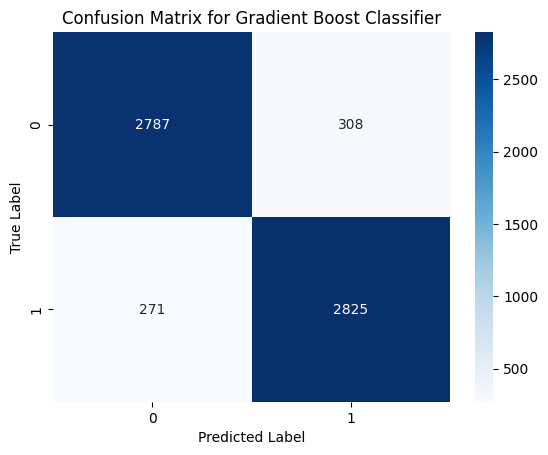

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient Boost Classifier")
plt.show()


In [43]:
# try randomized search instead of grid search
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats


# put the params as a random distribution instead of a specified range
param_distributions = {
    'learning_rate': stats.uniform(0.01, 0.19), 
    'max_depth': stats.randint(3, 8),           
    'l2_regularization': stats.uniform(0, 1)   
}

hgb_reg = HistGradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    hgb_reg,
    param_distributions,
    n_jobs=8,
    cv=3,
    n_iter=10,     
    random_state=42
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   n_jobs=8,
                   param_distributions={'l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5ea1a64150>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5e4cac9150>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5ea1afa410>},
                   random_state=42)

In [44]:
random_search.best_estimator_

HistGradientBoostingClassifier(l2_regularization=0.6011150117432088,
                               learning_rate=0.14453378978124864, max_depth=7,
                               random_state=42)

In [45]:
model = random_search.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3095
           1       0.90      0.91      0.90      3096

    accuracy                           0.90      6191
   macro avg       0.90      0.90      0.90      6191
weighted avg       0.90      0.90      0.90      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7222
           1       0.94      0.95      0.94      7221

    accuracy                           0.94     14443
   macro avg       0.94      0.94      0.94     14443
weighted avg       0.94      0.94      0.94     14443



In [46]:
# try gradientboost with early stopping to reduce potential overfitting and validation
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

hgb = HistGradientBoostingClassifier(
    random_state=42,
    early_stopping=True,       # enable early stoppoing
    n_iter_no_change=10,       # stop if no improvement for 10 iterations
    validation_fraction=0.1    
)

param_grid = {
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 7],
   'l2_regularization': [0, 0.1, 1]
}

grid_search = GridSearchCV(hgb, param_grid, n_jobs=8, cv=3)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=HistGradientBoostingClassifier(early_stopping=True,
                                                      random_state=42),
             n_jobs=8,
             param_grid={'l2_regularization': [0, 0.1, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7]})

In [78]:
model = grid_search.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3095
           1       0.90      0.91      0.91      3096

    accuracy                           0.91      6191
   macro avg       0.91      0.91      0.91      6191
weighted avg       0.91      0.91      0.91      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7222
           1       0.96      0.96      0.96      7221

    accuracy                           0.96     14443
   macro avg       0.96      0.96      0.96     14443
weighted avg       0.96      0.96      0.96     14443



In [80]:
# try ensemble between best performing model and the other models used
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

best_hgb = grid_search.best_estimator_
best_rf = gscv.best_estimator_

ensemble_model = VotingClassifier(
    estimators=[
        ('hgb', best_hgb),
        ('rf', best_rf)
    ],
    voting='soft'
)

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
print("Ensemble Performance on TEST\n*******************")
print(classification_report(y_test, y_pred))


Ensemble Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3095
           1       0.90      0.91      0.91      3096

    accuracy                           0.91      6191
   macro avg       0.91      0.91      0.91      6191
weighted avg       0.91      0.91      0.91      6191

